In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA

import h2o
from h2o.automl import H2OAutoML

/home/jose/.local/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = pd.read_csv('how-long-would-you-stay-data-ft-apr-2021/hospital_train.csv', index_col=0)


In [3]:
df = df.reset_index(drop=True)
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,6,a,6,X,2,gynecology,R,F,4.0,45810,2.0,Urgent,Moderate,2,21-30,2817.0,0-10
1,23,a,6,X,4,gynecology,Q,F,2.0,128565,15.0,Trauma,Moderate,4,51-60,4498.0,21-30
2,2,c,5,Z,2,anesthesia,S,F,3.0,46565,5.0,Urgent,Moderate,2,71-80,4573.0,11-20
3,32,f,9,Y,3,gynecology,S,B,4.0,124546,6.0,Emergency,Moderate,4,11-20,7202.0,51-60
4,14,a,1,X,3,gynecology,S,E,2.0,22729,8.0,Urgent,Moderate,2,51-60,3398.0,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,12,a,9,Y,3,gynecology,R,B,3.0,82914,3.0,Emergency,Moderate,6,51-60,3966.0,More than 100 Days
99996,28,b,11,X,2,gynecology,R,F,2.0,40026,5.0,Urgent,Moderate,3,21-30,4005.0,51-60
99997,6,a,6,X,3,gynecology,Q,F,3.0,92346,2.0,Trauma,Minor,2,31-40,5215.0,31-40
99998,32,f,9,Y,2,gynecology,S,B,4.0,113798,15.0,Trauma,Moderate,3,41-50,5092.0,11-20


In [4]:
df = df.fillna(0)
df['13'].unique()
diccionario_13 = {'Minor': 1, 'Moderate': 2, 'Extreme': 3}
diccionario_12 = {
    "Emergency" : 1,
    "Trauma" : 2,
    "Urgent" : 3
}


# Age of the patient
diccionario_15 = {
    "0-10" : 1,
    "11-20" : 2,
    "21-30" : 3,
    "31-40" : 4,
    "41-50" : 5,
    "51-60" : 6,
    "61-70" : 7,
    "71-80" : 8,
    "81-90" : 9,
    "91-100" : 10,
}

# Stay Days by the patient
diccionario_17 = {
    "0-10" : 1,
    "11-20" : 2,
    "21-30" : 3,
    "31-40" : 4,
    "41-50" : 5,
    "51-60" : 6,
    "61-70" : 7,
    "71-80" : 8,
    "81-90" : 9,
    "91-100" : 10,
    "More than 100 Days" : 11
}

#df["2"] = le.fit_transform(df["2"])
#df["4"] = le.fit_transform(df["4"])
#df["6"] = le.fit_transform(df["6"])
#df["7"] = le.fit_transform(df["7"])
#df["8"] = le.fit_transform(df["8"])
#df["12"] = le.fit_transform(df["12"])
#df["15"] = le.fit_transform(df["15"])
df['13'] = df['13'].apply(lambda x: diccionario_13[x])
df['12'] = df['12'].apply(lambda x: diccionario_12[x])
df['15'] = df['15'].apply(lambda x: diccionario_15[x])
#df['17'] = df['17'].apply(lambda x: diccionario_17[x])


target = df["17"]
df.drop('17', axis=1, inplace=True)

df = pd.get_dummies(df)

In [5]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

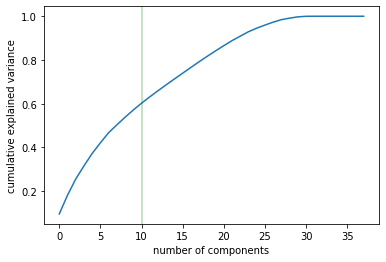

In [6]:
pca = PCA()
pca.fit(pd.get_dummies(df))
fig, ax = plt.subplots()
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('number of components')
ax.set_ylabel('cumulative explained variance')
ax.axvline(10, c='green', alpha=0.3)

In [7]:
df

,1,3,5,9,10,11,12,13,14,15,...,7_R,7_S,7_T,7_U,8_A,8_B,8_C,8_D,8_E,8_F
0,-1.429165,0.394291,-1.022764,1.572874,-0.531863,-1.074732,1.770393,0.139756,-0.724828,-1.128304,...,1.217123,-0.567358,-0.067682,-0.005477,-0.308788,-0.349187,-0.354481,-0.442897,-0.456717,1.344811
1,0.541579,0.394291,0.685815,-0.711338,1.653223,1.654613,0.320570,0.139756,0.394191,0.460842,...,-0.821609,-0.567358,-0.067682,-0.005477,-0.308788,-0.349187,-0.354481,-0.442897,-0.456717,1.344811
2,-1.892870,0.072005,-1.022764,0.430768,-0.511928,-0.444883,1.770393,0.139756,-0.724828,1.520272,...,-0.821609,1.762557,-0.067682,-0.005477,-0.308788,-0.349187,-0.354481,-0.442897,-0.456717,1.344811
3,1.584914,1.361147,-0.168474,1.572874,1.547104,-0.234934,-1.129253,0.139756,0.394191,-1.658019,...,-0.821609,1.762557,-0.067682,-0.005477,-0.308788,2.863796,-0.354481,-0.442897,-0.456717,-0.743599
4,-0.501756,-1.217137,-0.168474,-0.711338,-1.141301,0.184966,1.770393,0.139756,-0.724828,0.460842,...,-0.821609,1.762557,-0.067682,-0.005477,-0.308788,-0.349187,-0.354481,-0.442897,2.189538,-0.743599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.733608,1.361147,-0.168474,0.430768,0.447841,-0.864783,-1.129253,0.139756,1.513211,0.460842,...,1.217123,-0.567358,-0.067682,-0.005477,-0.308788,2.863796,-0.354481,-0.442897,-0.456717,-0.743599
99996,1.121210,2.005719,-1.022764,-0.711338,-0.684586,-0.444883,1.770393,0.139756,-0.165318,-1.128304,...,1.217123,-0.567358,-0.067682,-0.005477,-0.308788,-0.349187,-0.354481,-0.442897,-0.456717,1.344811
99997,-1.429165,0.394291,-0.168474,0.430768,0.696886,-1.074732,0.320570,-1.369811,-0.724828,-0.598589,...,-0.821609,-0.567358,-0.067682,-0.005477,-0.308788,-0.349187,-0.354481,-0.442897,-0.456717,1.344811
99998,1.584914,1.361147,-1.022764,1.572874,1.263311,1.654613,0.320570,0.139756,-0.165318,-0.068874,...,-0.821609,1.762557,-0.067682,-0.005477,-0.308788,2.863796,-0.354481,-0.442897,-0.456717,-0.743599


In [8]:
df = pd.concat([df, target], axis=1)

In [9]:
df

,1,3,5,9,10,11,12,13,14,15,...,7_S,7_T,7_U,8_A,8_B,8_C,8_D,8_E,8_F,17
0,-1.429165,0.394291,-1.022764,1.572874,-0.531863,-1.074732,1.770393,0.139756,-0.724828,-1.128304,...,-0.567358,-0.067682,-0.005477,-0.308788,-0.349187,-0.354481,-0.442897,-0.456717,1.344811,0-10
1,0.541579,0.394291,0.685815,-0.711338,1.653223,1.654613,0.320570,0.139756,0.394191,0.460842,...,-0.567358,-0.067682,-0.005477,-0.308788,-0.349187,-0.354481,-0.442897,-0.456717,1.344811,21-30
2,-1.892870,0.072005,-1.022764,0.430768,-0.511928,-0.444883,1.770393,0.139756,-0.724828,1.520272,...,1.762557,-0.067682,-0.005477,-0.308788,-0.349187,-0.354481,-0.442897,-0.456717,1.344811,11-20
3,1.584914,1.361147,-0.168474,1.572874,1.547104,-0.234934,-1.129253,0.139756,0.394191,-1.658019,...,1.762557,-0.067682,-0.005477,-0.308788,2.863796,-0.354481,-0.442897,-0.456717,-0.743599,51-60
4,-0.501756,-1.217137,-0.168474,-0.711338,-1.141301,0.184966,1.770393,0.139756,-0.724828,0.460842,...,1.762557,-0.067682,-0.005477,-0.308788,-0.349187,-0.354481,-0.442897,2.189538,-0.743599,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.733608,1.361147,-0.168474,0.430768,0.447841,-0.864783,-1.129253,0.139756,1.513211,0.460842,...,-0.567358,-0.067682,-0.005477,-0.308788,2.863796,-0.354481,-0.442897,-0.456717,-0.743599,More than 100 Days
99996,1.121210,2.005719,-1.022764,-0.711338,-0.684586,-0.444883,1.770393,0.139756,-0.165318,-1.128304,...,-0.567358,-0.067682,-0.005477,-0.308788,-0.349187,-0.354481,-0.442897,-0.456717,1.344811,51-60
99997,-1.429165,0.394291,-0.168474,0.430768,0.696886,-1.074732,0.320570,-1.369811,-0.724828,-0.598589,...,-0.567358,-0.067682,-0.005477,-0.308788,-0.349187,-0.354481,-0.442897,-0.456717,1.344811,31-40
99998,1.584914,1.361147,-1.022764,1.572874,1.263311,1.654613,0.320570,0.139756,-0.165318,-0.068874,...,1.762557,-0.067682,-0.005477,-0.308788,2.863796,-0.354481,-0.442897,-0.456717,-0.743599,11-20


In [10]:
train = df[:80000]
test = df[:-20001:-1]

In [11]:
train.shape

(80000, 39)

In [12]:
test.shape

(20000, 39)

In [13]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 59 mins
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,1 month and 7 days
H2O_cluster_name:,H2O_from_python_jose_9pqzzk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.025 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [14]:
h2train = h2o.H2OFrame(train)
h2test = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [15]:
columnas = [a for a in h2train.columns if a != "17"]
x = columnas
y = "17"

In [16]:
automl = H2OAutoML(max_runtime_secs=300, sort_metric='mean_per_class_error')
automl.train(x=x, y=y, training_frame=h2train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [37]:
automl.leaderboard

model_id,mean_per_class_error,logloss,rmse,mse,auc,aucpr
StackedEnsemble_AllModels_AutoML_20210627_174418,0.768362,1.54652,0.73697,0.543125,nan,nan
GBM_3_AutoML_20210627_174418,0.771312,2.05927,0.867806,0.753087,nan,nan
StackedEnsemble_BestOfFamily_AutoML_20210627_174418,0.773477,1.55885,0.740363,0.548137,nan,nan
GBM_2_AutoML_20210627_174418,0.776918,2.05996,0.867991,0.753408,nan,nan
XGBoost_2_AutoML_20210627_174418,0.778254,1.9632,0.850242,0.722912,nan,nan
GBM_4_AutoML_20210627_174418,0.779878,2.17979,0.884504,0.782347,nan,nan
XGBoost_3_AutoML_20210627_174418,0.780586,1.81029,0.821389,0.67468,nan,nan
GBM_5_AutoML_20210627_174418,0.782272,2.19076,0.886344,0.785606,nan,nan
XGBoost_grid__1_AutoML_20210627_174418_model_1,0.786873,1.82472,0.822175,0.675972,nan,nan
DeepLearning_grid__1_AutoML_20210627_174418_model_2,0.792026,1.63057,0.751087,0.564131,nan,nan


In [18]:
a

NameError: name 'a' is not defined

## Predicción 

In [ ]:
test = pd.read_csv('how-long-would-you-stay-data-ft-apr-2021/hospital_test.csv', index_col=0)

In [ ]:
test = test.fillna(0)
test['13'].unique()
diccionario_13 = {'Minor': 0, 'Moderate': 1, 'Extreme': 2}

le = LabelEncoder()
test["2"] = le.fit_transform(test["2"])
test["4"] = le.fit_transform(test["4"])
test["6"] = le.fit_transform(test["6"])
test["7"] = le.fit_transform(test["7"])
test["8"] = le.fit_transform(test["8"])
test["12"] = le.fit_transform(test["12"])
test["15"] = le.fit_transform(test["15"])
test['13'] = test['13'].apply(lambda x: diccionario_13[x])

test = pd.DataFrame(scaler.fit_transform(test), columns=test.columns, index=test.index)

In [ ]:
h2test = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
test.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,,,,,,,,,,,,,,,,
314114,0.081230,-0.817644,0.719671,0.295902,0.686327,0.098915,1.382554,-0.760545,-0.709506,-0.168530,0.173261,-1.136777,-1.371718,-0.731372,-0.067110,-0.095923
208989,-0.382030,0.482800,0.075000,1.626070,-0.170294,0.098915,1.382554,1.017053,-0.709506,0.960735,1.632692,0.312106,0.136173,-0.159178,-0.595734,0.780214
305872,-0.150400,1.783243,-1.214343,-1.034265,0.686327,0.098915,0.140942,0.424521,1.578265,-1.573049,-0.660699,-1.136777,-1.371718,-0.159178,1.518764,0.166185
266099,-1.771812,0.482800,-0.569672,1.626070,0.686327,-3.475109,0.140942,-1.945610,-0.709506,-0.237797,0.381751,1.760989,1.644064,0.413016,-0.595734,-1.492611
13228,-1.424367,-0.817644,0.397335,-1.034265,0.686327,0.098915,0.140942,1.017053,-1.853391,1.328959,0.173261,-1.136777,-1.371718,-0.159178,-1.124359,-0.223311


In [ ]:
index_test = list(test.index)

### 2. Carga los datos de `diamonds_test.csv` para predecir.

**¿De dónde saco `diamonds_test.csv`?**

In [ ]:
predictions_submit = automl.leader.predict(h2test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [ ]:
#predictions_submit = np.argmax(predictions_submit, axis=1).reshape(-1, 1).copy()

In [ ]:
predictions_submit = predictions_submit['predict']

In [ ]:
predictions_submit.shape

(133744, 1)

In [ ]:
predictions_submit.as_data_frame()

,predict
0,11-20
1,51-60
2,11-20
3,51-60
4,21-30
...,...
133739,11-20
133740,51-60
133741,11-20
133742,21-30


In [ ]:
submission_test = pd.read_csv('how-long-would-you-stay-data-ft-apr-2021/sample_submission.csv')
submission_test.head()

,id,days
0,314114,11-20
1,208989,31-40
2,305872,81-90
3,266099,21-30
4,13228,31-40


In [ ]:
submission_test.shape

(133744, 2)

(array([32762., 23145.,  2077., 36744.,  4253.,  1119., 10062.,  4933.,
        14742.,  3907.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

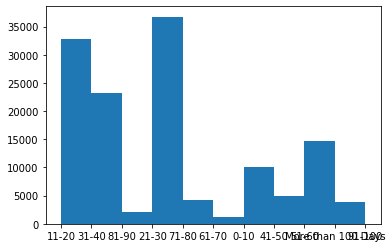

In [ ]:
plt.hist(x=submission_test['days'])

In [ ]:
submission = pd.DataFrame({"id": index_test, "days": predictions_submit.as_data_frame()['predict']})

In [ ]:
submission.head()

,id,days
0,314114,11-20
1,208989,51-60
2,305872,11-20
3,266099,51-60
4,13228,21-30


(array([4.0772e+04, 1.9517e+04, 5.4655e+04, 1.1602e+04, 0.0000e+00,
        2.3950e+03, 4.3100e+03, 3.7600e+02, 1.1100e+02, 6.0000e+00]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

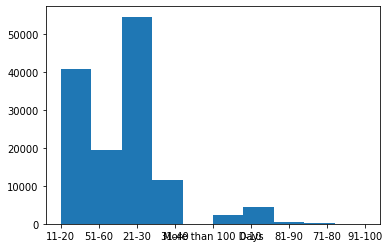

In [ ]:
plt.hist(x=submission['days'])

In [ ]:
submission.shape

(133744, 2)

In [ ]:
submission.to_csv('submission.csv', index=False)


In [38]:
h2o.cluster().shutdown()

H2O session _sid_820e closed.
